#### 16.시/도/군/구별 매출을 집계해서 시각화하자

In [15]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('/Users/yun-yeongjun/Desktop/Technique100/make_data')
order_data = pd.read_csv('order_data.csv')
print(len(order_data))
order_data.head()

703886


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,지불 완료
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivery,배달 완료
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9,화중로점,GB,경기,경기북부,delivery,주문 취소
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivery,배달 완료
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivery,배달 완료


In [3]:
analyze_data = pd.read_csv('analyze_data.csv')
analyze_data.head()

,Unnamed: 0,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name,order_accept_month,delivered_month
0,0,11,C65806632,57,2021-04-01 11:00:00,2021-04-01 11:39:00,28270,자양로점,서울,서울,takeout,지불 완료,202104,202104
1,1,59,C09760173,37,2021-04-01 11:00:00,2021-04-01 11:34:00,28270,가마산로2점,서울,서울,delivery,배달 완료,202104,202104
2,3,127,C64119972,17,2021-04-01 11:00:00,2021-04-01 11:17:00,23080,분포로점,부산,부산,delivery,배달 완료,202104,202104
3,4,174,C10231192,18,2021-04-01 11:00:00,2021-04-01 11:35:00,46920,하남산단점,광주,광주,delivery,배달 완료,202104,202104
4,5,167,C06298599,21,2021-04-01 11:00:00,2021-04-01 11:59:00,37420,서하로점,광주,광주,takeout,지불 완료,202104,202104


* narrow_area: 시/도/군/구
* wide_area: 경기도 남북부를 하나로 묶은 것을 알 수 있음

In [4]:
# 시/도/군/구의 월별 매출을 pivot table을 이용한 교차 집계로 확인
pre_data = pd.pivot_table(analyze_data, 
                          index='order_accept_month', 
                          columns='narrow_area', 
                          values='total_amount', 
                          aggfunc='mean')
pre_data

narrow_area,경기남부,경기북부,광주,대전,부산,서울,세종
order_accept_month,,,,,,,
202104,29921.372816,29411.301522,29779.375703,29596.448941,29480.050738,29602.127172,29471.925249
202105,29984.839912,29486.277805,29763.962208,29524.168829,29501.991619,29633.118114,29415.088028
202106,29890.268365,29467.159844,29773.368348,29563.722047,29503.018255,29625.387817,29353.566644


* parameter
    -  집계 대상 데이터
    - index: 행 이름
    - columns: 열 이름
    - values: 사용하는 값
    - aggfunc: 집계 방법

/Users/yun-yeongjun/opt/anaconda3/envs/study/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yun-yeongjun/opt/anaconda3/envs/study/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yun-yeongjun/opt/anaconda3/envs/study/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yun-yeongjun/opt/anaconda3/envs/study/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yun-yeongjun/opt/anaconda3/envs/study/lib/python3.9/site-packages/IPython/core/pylabtools.py:15

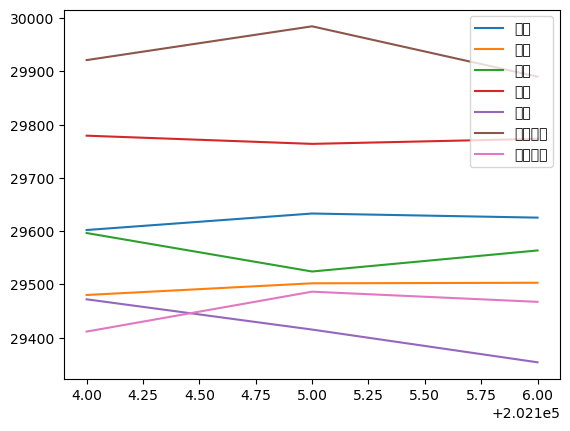

In [5]:
# 결과를 시각화
plt.plot(list(pre_data.index), pre_data['서울'], label='서울')
plt.plot(list(pre_data.index), pre_data['부산'], label='부산')
plt.plot(list(pre_data.index), pre_data['대전'], label='대전')
plt.plot(list(pre_data.index), pre_data['광주'], label='광주')
plt.plot(list(pre_data.index), pre_data['세종'], label='세종')
plt.plot(list(pre_data.index), pre_data['경기남부'], label='경기남부')
plt.plot(list(pre_data.index), pre_data['경기북부'], label='경기북부')
plt.legend()

폰트 처리 안해줘서 한글이 깨짐

In [10]:
# matplotlib을 이용한 시각화

# 한글 폰트 처리
if os.name == 'ns': #windows
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix': #mac
    plt.rc('font', family='AppleGothic')
    
plt.rc('axes', unicode_minus=False)  #minus font settings

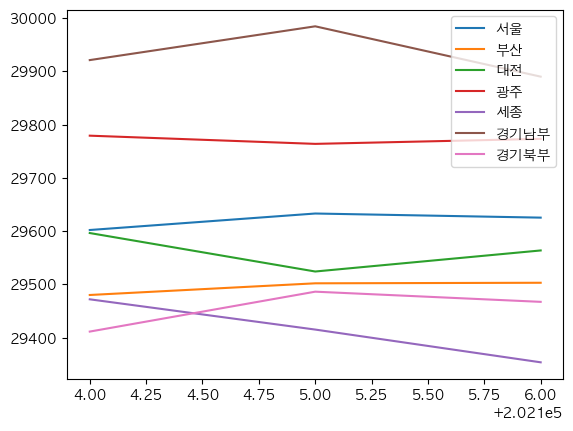

In [11]:
# 결과를 시각화
plt.plot(list(pre_data.index), pre_data['서울'], label='서울')
plt.plot(list(pre_data.index), pre_data['부산'], label='부산')
plt.plot(list(pre_data.index), pre_data['대전'], label='대전')
plt.plot(list(pre_data.index), pre_data['광주'], label='광주')
plt.plot(list(pre_data.index), pre_data['세종'], label='세종')
plt.plot(list(pre_data.index), pre_data['경기남부'], label='경기남부')
plt.plot(list(pre_data.index), pre_data['경기북부'], label='경기북부')
plt.legend()

* parameter
    - 인덱스 리스트
    - 이용할 컬럼
    - 범례에 표시할 값
---
금액 차이가 크게 나지는 않지만, 경기 남부의 매출이 가장 높고 세종의 매출이 가장 낮은 것을 알 수 있음

#### 17. 클러스터링을 위해 데이터를 가공하자
* 클러스터링을 이용해 매장을 그룹화 
    - 각 매장의 특징에 기반해 몇 가지 그룹으로 나눌 수 있다면 해당 그룹의 특징에 맞춰 대상을 찾아낼 수도 있다.

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# 주문 데이터를 매장별로 집계해 클러스터링에 사용할 수 있는 상태로 만들기
store_clustering = analyze_data.groupby('store_id').agg(['size', 'mean', 'median', 'max', 'min'])['total_amount']
store_clustering.reset_index(inplace=True, drop=True)
print(len(store_clustering))
store_clustering.head()

196


,size,mean,median,max,min
0,2879,31295.953456,30500.0,51000,18570
1,2829,29073.004595,27320.0,47440,6980
2,2098,27161.224976,26770.0,47440,6980
3,2474,28971.556184,27320.0,47440,6980
4,3062,30225.845852,29870.0,51000,6980


- analyze_data를 store_id 기준으로 groupby
    - 집계한 값: total_amount
    - agg()로 주문 수, 평균값, 중앙값, 최댓값, 최솟값을 계산해서 store_clustering에 저장
    - reset_index: 인덱스 초기화
        - inplace: 데이터프레임의 직접 수정 여부
            - True: 직접 수정
            - False: 사본을 만들어 수정
        - drop: 데이터 프레임 컬럼에 인덱스 추가 여부
            - True: 인덱스 초기화
            - False: 인덱스 초기화 X

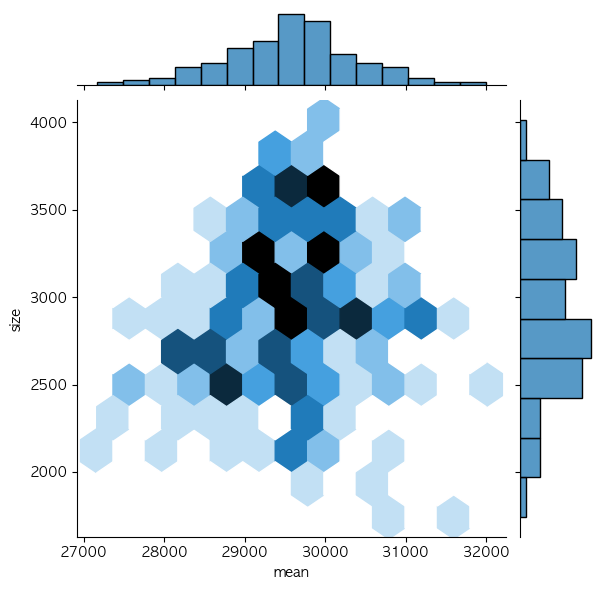

In [17]:
# 클러스터링 전에 각 매장의 상황을 시각화(matplotlib, seaborn 둘 다 가능)
hexbin = sns.jointplot(x='mean', y='size', data=store_clustering, kind='hex')

1. 1회 주문당 29,000원에서 30,000원의 주문이 많은 것으로 보인다.
2. 주문수에서는 극단적인 이상치는 없는 것을 알 수 있다.

#### 18. 클러스터링을 이용해 매장을 그룹화하자
* scikit-learn의 k-means clustering을 이용.
    - 비지도 학습

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
store_clustering_scaler = scaler.fit_transform(store_clustering)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(store_clustering_scaler)
store_clustering['cluster'] = clusters.labels_
print(store_clustering['cluster'].unique())
store_clustering.head()

[2 0 3 1]


,size,mean,median,max,min,cluster
0,2879,31295.953456,30500.0,51000,18570,2
1,2829,29073.004595,27320.0,47440,6980,0
2,2098,27161.224976,26770.0,47440,6980,0
3,2474,28971.556184,27320.0,47440,6980,0
4,3062,30225.845852,29870.0,51000,6980,3


* 행별 설명
    - 1~2: pakage import
    - 3~4: data normalization(표준화)
        - 지금 이용하는 데이터는 매장별 주문 수와 매출액
        - 지역에 따라 주문 수에 차이가 있고, 값의 스케일이 다를 가능성이 있다.
        - 이런 경우 머신러닝 전 표준화를 통해 스케일을 맞춰줘야 한다.
    - 5: 클러스터 수와 난수 시드 정의
        - 클러스터 수는 다양한 시도를 통해 최적의 값을 찾아야함
    - 6: 모델 구축
    - 7: 클러스터링 결과를 store_clustering['cluster']에 저장
    

#### 19. 그룹의 경향을 분석하자

In [19]:
# 4개 그룹의 경향을 분석
# 먼저 각 그룹의 건수 확인
store_clustering.columns = ['월 건수', '월 평균값', '월 중앙값', '월 최댓값', '월 최솟값', 'cluster']
store_clustering.groupby('cluster').count()

,월 건수,월 평균값,월 중앙값,월 최댓값,월 최솟값
cluster,,,,,
0,67,67,67,67,67
1,91,91,91,91,91
2,14,14,14,14,14
3,24,24,24,24,24


* store_clustering.groupby로 그룹화 후, count()로 각각의 건수를 확인한다.
---
0과 1이 많고, 2와 3이 적다. 건수가 적은 2,3에서 특징을 찾아낼 수 있을 수도 있다.

In [20]:
# 일단 이 이상의 필터링은 어렵다고 함
# 그래서 각 그룹의 금액도 함께 확인
store_clustering.groupby('cluster').mean()

,월 건수,월 평균값,월 중앙값,월 최댓값,월 최솟값
cluster,,,,,
0,2611.850746,28852.089951,27268.955224,47513.582090,7447.611940
1,3263.967033,29673.335288,27967.032967,50765.274725,7403.736264
2,2513.642857,30717.437262,28804.285714,48965.714286,18820.714286
3,2801.208333,30637.966387,30085.416667,50236.666667,7582.500000


#### 20. 클러스터링 결과를 t-SNE로 시각화하자
* 항목이 많다는 것은 고차원 데이터라고 바꿔 말할 수 있다.
    - 이 고차원 데이터를 그대로 2차원 그래프로 표현할 수는 없음
    - 차원수를 줄여 시각화할 수 있는 상태로 만들어야 함: **차원 소멸**
        - 이를 지원하는 비지도 학습 라이브러리가 제공됨: 그 중 하나가 t-SNE

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x = tsne.fit_transform(store_clustering_scaler)
tsne_df = pd.DataFrame(x)
tsne_df['cluster'] = store_clustering['cluster']
tsne_df.columns = ['axis_0', 'axis_1', 'cluster']
tsne_df.head()

,axis_0,axis_1,cluster
0,5.469148,-2.941933,2
1,10.830171,10.466086,0
2,15.963300,13.701761,0
3,12.874681,9.171793,0
4,-2.890113,-1.948352,3


- 1: t-SNE 라이브러리 import
- 2: t-SNE 정의
    - n_components: 2로 지정해 2차원으로의 소멸을 지정
- 3: 모델 구축(전달되는 인자는 테크닉 18에서 만든 store_clustering_scaler)
- 4: 3의 값을 데이터프레임에 저장
- 5: 클러스터 ID를 연결
- 6: 데이터 항목 이름을 재설정


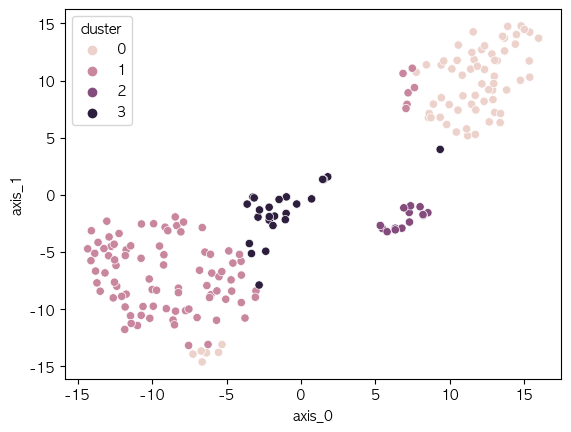

In [24]:
# 산포도를 이용한 시각화
tsne_graph = sns.scatterplot(x='axis_0', y='axis_1', hue='cluster', data=tsne_df)